In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
train = pd.read_csv('data/train.csv')
train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [36]:
X = train.drop(['id','Age'],axis=1)
y = train['Age']

In [37]:
X.shape, y.shape

((74051, 8), (74051,))

In [38]:
X = pd.get_dummies(X,drop_first=True)
X.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1,0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1,0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,0,1
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,0,0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1,0


In [39]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((59240, 9), (59240,), (14811, 9), (14811,))

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf = RandomForestRegressor()

In [42]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [45]:
y_pred = rf.predict(X_val)

In [46]:
mae_0 = mean_absolute_error(y_val,np.round(y_pred))
mae_0

1.4379177638241847

In [47]:
train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [15]:
lr = LinearRegression()

C:\Users\HN464GK\AppData\Local\Temp\ipykernel_19836\1524494364.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


<Axes: >

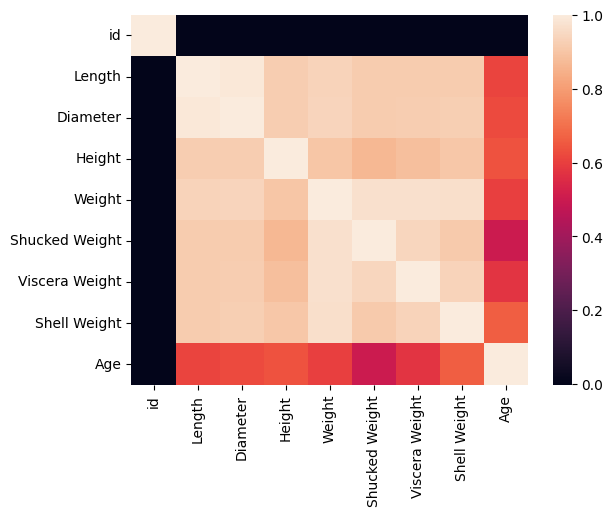

In [48]:
sns.heatmap(train.corr())

In [16]:
model_0 = lr.fit(X_train,y_train)

In [17]:
y_pred = model_0.predict(X_val)

In [19]:
from sklearn.metrics import mean_absolute_error

mae_0 = mean_absolute_error(y_val,np.round(y_pred))
mae_0

1.4584430490851394

In [28]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV



model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

In [29]:
y_pred = model_lasso.predict(X_val)
mae_0 = mean_absolute_error(y_val,np.round(y_pred))
mae_0

1.4648572007291878

In [31]:
X_train = sm.add_constant(X_train)
model_2 = sm.OLS(y_train,X_train).fit()

In [33]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     8035.
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:12:19   Log-Likelihood:            -1.2902e+05
No. Observations:               59240   AIC:                         2.581e+05
Df Residuals:                   59230   BIC:                         2.582e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.7522      0.085     44.

In [11]:
test = pd.read_csv('data/test.csv')

In [12]:
test.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
dtype: int64

In [13]:
test = pd.get_dummies(test,drop_first=True)
test.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_M
0,74051,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,1,0
1,74052,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,1,0
2,74053,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,0,0
3,74054,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676,0,0
4,74055,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066,1,0


In [14]:
test = test.drop('id',axis=1)

In [15]:
test = scaler.transform(test)
test

array([[-0.92947065, -1.10363066, -0.79416309, ..., -1.11660983,
         1.44602779, -0.75938146],
       [-0.53851331, -0.57708136, -0.79416309, ..., -0.76860288,
         1.44602779, -0.75938146],
       [-0.10411627, -0.15584192, -0.2508817 , ..., -0.53132541,
        -0.69154964, -0.75938146],
       ...,
       [ 0.590919  ,  0.5813271 ,  0.15657934, ...,  0.57596945,
        -0.69154964, -0.75938146],
       [-0.27787508, -0.31380671, -0.65834274, ..., -0.49177916,
        -0.69154964, -0.75938146],
       [ 1.19907486,  1.16053133,  0.97150142, ...,  1.05052439,
        -0.69154964,  1.31686122]])

In [16]:
y_pred = model_0.predict(X)

In [20]:
from sklearn.metrics import mean_absolute_error

mae_0 = mean_absolute_error(y,np.round(y_pred))
mae_0

1.4597237039337754

In [19]:
sample_submission_df = pd.read_csv('data/sample_submission.csv')
sample_submission_df['Age'] = model_0.predict(test)
sample_submission_df.to_csv('data/submission0.csv', index=False)
sample_submission_df.head()

,id,Age
0,74051,7.735472
1,74052,7.682365
2,74053,10.432966
3,74054,9.556131
4,74055,7.504141


In [24]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV



model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)